# CS235 Data Mining Project
## NYC AirBnb Dataset

Sources / Code Examples Looked at: 
https://medium.com/machine-learning-algorithms-from-scratch/k-means-clustering-from-scratch-in-python-1675d38eee42

In [47]:
import numpy as np
import pandas as pd
import random as rd
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

#pd.set_option('display.max_columns', 100)

In [48]:
# Read in data

df = pd.read_csv('data/new-york-city-airbnb-open-data/AB_NYC_2019.csv')
print('Length of df: %f' % len(df))
df.neighbourhood_group.unique()

Length of df: 48895.000000


array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

### Clean the Data 

In [97]:
# Perform data cleaning and manipulation
import pandas.api.types as ptypes

# Normalize the price by minimum_nights
df['price_normalized'] = df['price']/df['minimum_nights']
# Filter out listings with price of 0 
df = df[df['price'] > 0]
# Filter out listings that are available for 0 days out of the year?
df[df['availability_365'] < 10]

# Function to remove large outliers
def remove_outliers(df):
    low = .10 #.05
    high = .90 #.95
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
      if ptypes.is_numeric_dtype(df[name]):
       df = df[(df[name] > quant_df.loc[low, name]) 
           & (df[name] < quant_df.loc[high, name])]
    return df


print('Length of df: %f' % len(df))
df.head()


Length of df: 48884.000000


id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9    10/19/18   
1  Entire home/apt    225               1                 45     5/21/19   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270      7/5/19   
4  Entire home/apt     80              10                  9    11/19/18   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
2                NaN                               1               365   
3               4.64                               1               194   
4               0.10                               1                 0   

   price_normalized                    geometry  
0             149.0  POINT (-73.97237 40.64749)  
1             225.0  POINT (-73.98377 40.75362)  
2              50.0  POINT (-73.94190 40.80902)  
3              89.0  POINT (-73.95976 40.68514)  
4               8.0  POINT (-73.94399 40.79851)

In [28]:
# Remove outliers - Lets look at the prices !!!!!!DELETE LATER!!!!!

# Computing IQR for 'price'

# Q1 = df['price'].quantile(0.25)
# Q3 = df['price'].quantile(0.75)
# IQR = Q3 - Q1

# # Filtering Values between Q1-1.5IQR and Q3+1.5IQR
# df_filtered = df.query('(@Q1 - 1.5 * @IQR) <= price <= (@Q3 + 1.5 * @IQR)')



### Heatmap to show feature correlations

Text(0.5,1,'Heatmap Showing Correlations of Features')

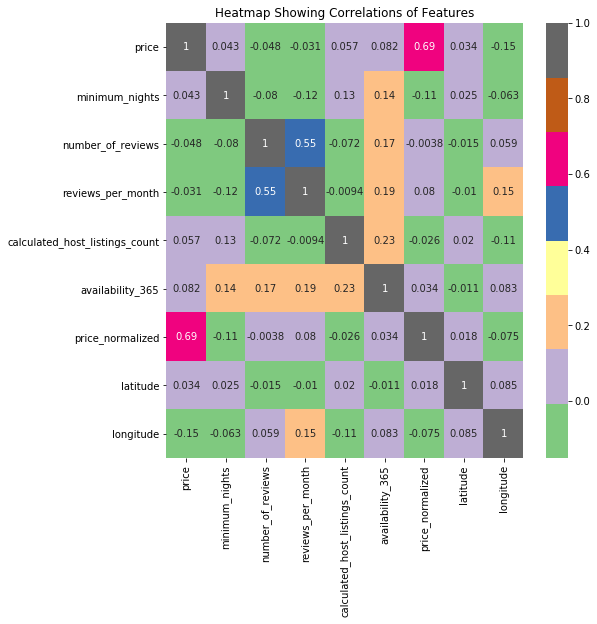

In [51]:
# Plot heatmap 

df_corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
           'calculated_host_listings_count', 'availability_365', 'price_normalized',
           'latitude', 'longitude']]

plt.figure(figsize=(8,8))  
sns.heatmap(df_corr.corr(), cmap='Accent', annot=True)
plt.title('Heatmap Showing Correlations of Features')

## Visualize The AirBnb Listings

In [52]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [53]:
# Read in a shape file of NYC

nb = gpd.read_file('Neighborhood Tabulation Areas/geo_export_40619f58-fd96-4939-9f41-bdb9fd1f7f99.shp')

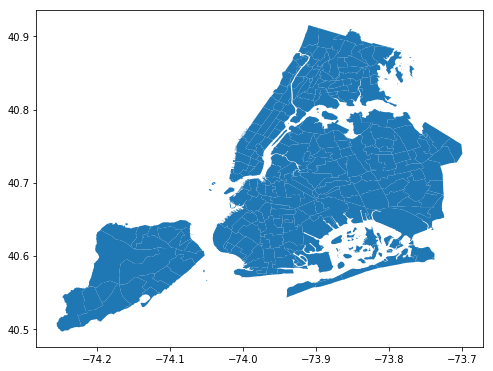

In [54]:
# Plot what the shape value looks like 

fig, ax = plt.subplots(figsize=(8,8))
nb.plot(ax = ax)

In [210]:
# Create a GeoPandas DataFrame which contains Points 

# First create geographic Points using the lat/long values from the DataFrame
geometry = [Point(xy) for xy in zip( df['longitude'], df['latitude'])]

crs = {'init': 'epsg:4326'} # specify our Coordinate Reference System (crs)

geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
geo_df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9    10/19/18   
1  Entire home/apt    225               1                 45     5/21/19   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270      7/5/19   
4  Entire home/apt     80              10                  9    11/19/18   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
2                NaN                               1               365   
3               4.64                               1               194   
4               0.10                               1                 0   

   price_normalized                    geometry  
0             149.0  POINT (-73.97237 40.64749)  
1             225.0  POINT (-73.98377 40.75362)  
2              50.0  POINT (-73.94190 40.80902)  
3              89.0  POINT (-73.95976 40.68514)  
4               8.0  POINT (-73.94399 40.79851)

Text(0.5,1,'NYC AirBnb Listings')

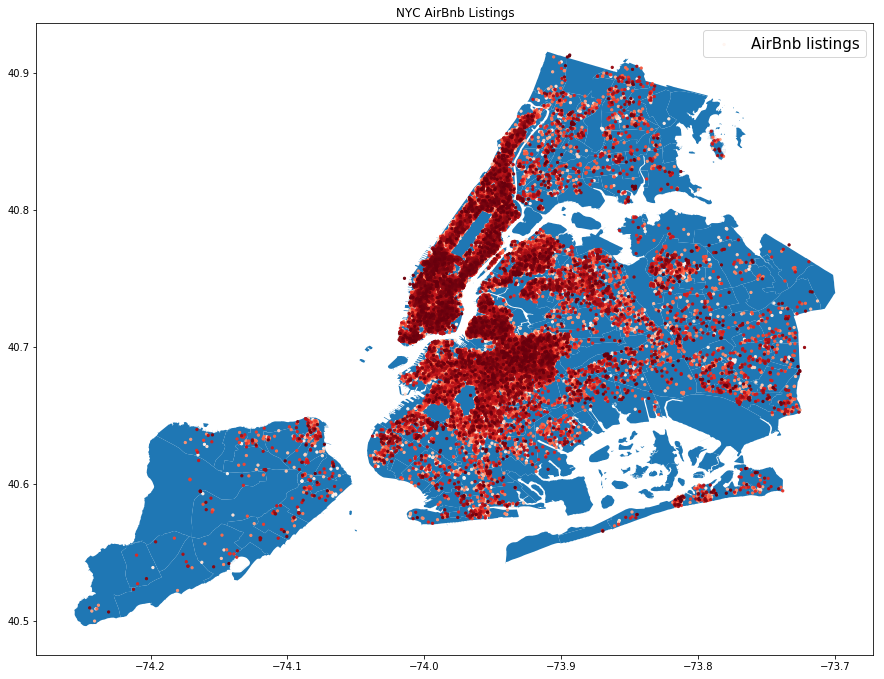

In [214]:
# Plot the AirBnb Listings over our Shapefile 

fig,ax = plt.subplots(figsize=(15,15))
nb.plot(ax = ax, alpha=1) #, color='grey')
geo_df.plot(ax=ax, markersize=5, cmap='Reds', #edgecolor='k',
            marker='o', label='AirBnb listings')
plt.legend(prop={'size':15})
#plt.figtext(.5,.9,'New York City Airbnb Listings', fontsize=20, ha='center')
plt.title('NYC AirBnb Listings')
#plt.savefig('NYC_listings')

# import contextily as ctx
# ctx.add_basemap(ax)
#ax.set_axis_bgcolor(water)

## Implement K-Means Algorithm to find novelties in the data

### We want to answer questions like:

#### Notes about K-Means: 
1. Pros \
    a. Simple, easy to implement \
    b. Efficient \
    c. Often terminates at local optimum \
    d. Works well in practice     
    e. If we start frommg good initial point we may converge faster 
2. Cons \
    a. Applicable to only objects in continuous n-dim space \
    b. Does not work with categorical data (unless transformed) \
    c. Need to specify K in advance \
    d. Sensitive to noisy data and outliers \
    e. Good when clusters are Gaussian \
    f. Each time we run algorithm, we may get different answer since we start at random k \
    g. You might have an empty cluster due to bad starting point 
   


#### Algorithm: 
1. Initialize cluster centroids \
	a. Pick k points at random and set as centroids represented each cluster 
2. Repeat while cluster assignments don't change \
	a. Assign each point to nearest centroid
    b. Given new assignments, compute new cluster centroids as mean of all possible points in cluster \
1) What neighborhoods are the most expensive? \
2) What room_types are most desirable? \
3) Cluster listing based on room_type / price / num_reviews (popularity) 


#### Intuition on Choosing K: 
1) # Unique Neighborhoods Groups: 5 \
            ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'] \
2) # Unique Room_Types: 3 \
            ['Private room', 'Entire home/apt', 'Shared room'] 
            

In [90]:
# Look at some basic stats in our data

df.describe()

id       host_id      latitude     longitude         price  \
count  4.888400e+04  4.888400e+04  48884.000000  48884.000000  48884.000000   
mean   1.901679e+07  6.762203e+07     40.728953    -73.952176    152.755053   
std    1.098432e+07  7.861666e+07      0.054532      0.046159    240.170260   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420     10.000000   
25%    9.470548e+06  7.817310e+06     40.690100    -73.983080     69.000000   
50%    1.967574e+07  3.079257e+07     40.723080    -73.955685    106.000000   
75%    2.915297e+07  1.074344e+08     40.763120    -73.936290    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48884.000000       48884.000000       38833.000000   
mean         7.029887          23.271991           1.373128   
std         20.512224          44.551331           1.680391   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  price_normalized  
count                    48884.000000      48884.000000      48884.000000  
mean                         7.144628        112.779498         70.190038  
std                         32.956185        131.627271        157.634605  
min                          1.000000          0.000000          0.040000  
25%                          1.000000          0.000000         20.000000  
50%                          1.000000         45.000000         44.500000  
75%                          2.000000        227.000000         81.666667  
max                        327.000000        365.000000       8000.000000

We can see that there are extreme min/max price values above

## Build a K-Means Algorithm

In [162]:
# Full K-Means Algorithm

'''
This function will take in a 2-dim pandas DataFrame and run a K-Means Algorithm on it.
Inputs required are: DataFrame, number of iterations (after convergence KMeans will give same solution),
and the number of clusters (K). K often requires intuition based on the dataset. 
The PlotElbow() function can help to determine an optimal number for K. 
'''

def KMeansAlgorithm(df, num_iter, K):
    
    # imports
    import numpy as np
    import pandas as pd
    import random as rd
    import seaborn as sns
    from matplotlib import pyplot as plt

    data = df.values 
    m = data.shape[0] # num training examples
    n = data.shape[1] # num of features
    
    def InitCentroidsRandom():
        # Centroids will be a (n x K) dimensional matrix. Each column will be one centroid for one cluster
        centroids = np.array([]).reshape(n, 0)
        for i in range(K): 
            rand = rd.randint(0, m-1)
            centroids = np.c_[centroids,data[rand]]
        return centroids # the KMeansAlgorithm() function will return centroids.T
    
    # Initiate centroids randomly 
    centroids = InitCentroidsRandom()
    result = {}
    
    # Begin iterations to update centroids, compute and update Euclidean distances
    for i in range(num_iter):
         # First compute the Euclidean distances and store them in array
          EucDist = np.array([]).reshape(m, 0)
          for k in range(K):
              dist = np.sum((data - centroids[:,k])**2, axis=1)
              EucDist = np.c_[EucDist, dist]
          # take the min distance 
          min_dist = np.argmin(EucDist, axis=1) + 1 
            
         # Begin iterations
          soln_temp = {} # temp dict which stores solution for one iteration - Y
            
          for k in range(K):
              soln_temp[k+1] = np.array([]).reshape(n, 0)
           
          for i in range(m):
              # regroup the data points based on the cluster index 
              soln_temp[min_dist[i]] = np.c_[soln_temp[min_dist[i]], data[i]]
          
          for k in range(K):
              soln_temp[k+1] = soln_temp[k+1].T
          # Updating centroids as the new mean for each cluster
          for k in range(K):
              centroids[:,k] = np.mean(soln_temp[k+1], axis=0)
          result = soln_temp
        
    def PlotClusters(result, centroids, K):
        # create arrays for colors and labels based on specified K
        colors = ["#"+''.join([rd.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(K)]
        labels = ['cluster_' + str(i+1) for i in range(K)]
        
        fig1 = plt.figure(figsize=(5,5))
        ax1 = plt.subplot(111)
        # plot each cluster
        for k in range(K):
            ax1.scatter(result[k+1][:,0], result[k+1][:,1], 
                        c = colors[k], label = labels[k])
        # plot centroids
        ax1.scatter(centroids[0,:],centroids[1,:], #alpha=.5,
                    s = 300, c = 'lime', label = 'centroids')
        plt.xlabel(df.columns[0]) # first column of df
        plt.ylabel(df.columns[1]) # second column of df
        plt.legend()
        plt.show()

        return 
            
    return result, centroids.T, PlotClusters(result, centroids, K)

'''
Elbow Method:
The elbow method will help us determine the optimal value for K. 
Steps: 
1) Use a range of K values to test which is optimal 
2) For each K value, calculate Within-Cluster-Sum-of-Squares (WCSS) 
3) Plot Num Clusters (K) x WCSS
'''
def PlotElbow(df, n_iter, K):
    
    wcss_vals = np.array([])
    for k_val in range(1,K):
#         print("K = {}".format(k_val))
        results = KMeansAlgorithm(df, n_iter, k_val)
        output = results[0]
        centroids = results[1]
#         print('Centroids:')
#         print(centroids)
        wcss=0
        for k in range(k_val):
            wcss += np.sum((output[k+1] - centroids[k,:])**2)
        wcss_vals = np.append(wcss_vals, wcss)
    # Plot K values vs WCSS values
    K_vals = np.arange(1, K)
    plt.plot(K_vals, wcss_vals)
    plt.xlabel('K Values')
    plt.ylabel('WCSS')
    plt.title('Elbow Method')
    plt.show()

In [167]:
# Run KMeans Algorithm on slices of data - room_type

df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

## Create Datasets - 'price_normalized' vs 'number_of_reviews'

In [178]:
# Creating pandas Series to run through Algorithm 

'''
We are interested in seeing if there is a correlation between 
price_normalized and number_of_reviews. The number of reviews
can be seen as a feature that shows a listing's popularity. 
We create separate Series for each room type, then further 
slice the data by neighbourhood_group 

We always use our above function remove_outliers()
since K-Means algorithm is very sensitive to noise and outliers
'''

# Private Rooms - Listings

priv = df[df.room_type == 'Private room']

priv_queens = priv[priv.neighbourhood_group == 'Queens']
priv_staten = priv[priv.neighbourhood_group == 'Staten Island']
priv_brook = priv[priv.neighbourhood_group == 'Brooklyn']

priv = priv[['price_normalized', 'number_of_reviews']]
priv = remove_outliers(priv)

priv_queens = priv_queens[['price_normalized', 'number_of_reviews']]
priv_queens = remove_outliers(priv_queens)

priv_staten = priv_staten[['price_normalized', 'number_of_reviews']]
priv_staten = remove_outliers(priv_staten)    

priv_brook = priv_brook[['price_normalized', 'number_of_reviews']]
priv_brook = remove_outliers(priv_brook) 


# Entire Home / Apartment - Listings

home = df[df.room_type == 'Entire home/apt']

home_queens = home[home.neighbourhood_group == 'Queens']
home_staten = home[home.neighbourhood_group == 'Staten Island']
home_brook = home[home.neighbourhood_group == 'Brooklyn']
home_man = home[home.neighbourhood_group == 'Manhattan']

home = home[['price_normalized', 'number_of_reviews']]
home = remove_outliers(home)

home_queens = home_queens[['price_normalized', 'number_of_reviews']]
home_queens = remove_outliers(home_queens)

home_staten = home_staten[['price_normalized', 'number_of_reviews']]
home_staten = remove_outliers(home_staten)    

home_brook = home_brook[['price_normalized', 'number_of_reviews']]
home_brook = remove_outliers(home_brook) 

home_man = home_man[['price_normalized', 'number_of_reviews']]
home_man = remove_outliers(home_man) 


# Shared Rooms - Listings


room = df[df.room_type == 'Shared room']

room_queens = room[room.neighbourhood_group == 'Queens']
room_staten = room[room.neighbourhood_group == 'Staten Island']
room_brook = room[room.neighbourhood_group == 'Brooklyn']
room_man = room[room.neighbourhood_group == 'Manhattan']

room = room[['price_normalized', 'number_of_reviews']]
room = remove_outliers(room)

room_queens = room_queens[['price_normalized', 'number_of_reviews']]
room_queens = remove_outliers(room_queens)

room_staten = room_staten[['price_normalized', 'number_of_reviews']]
room_staten = remove_outliers(room_staten)    

room_brook = room_brook[['price_normalized', 'number_of_reviews']]
room_brook = remove_outliers(room_brook) 

room_man = room_man[['price_normalized', 'number_of_reviews']]
room_man = remove_outliers(room_man)

### Run the Algorithm Using the Elbow Method to Find Best K Value

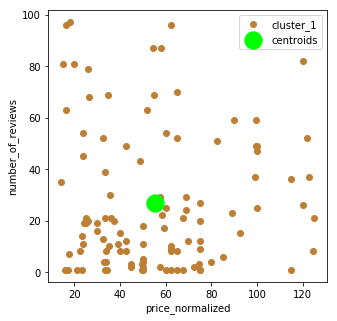

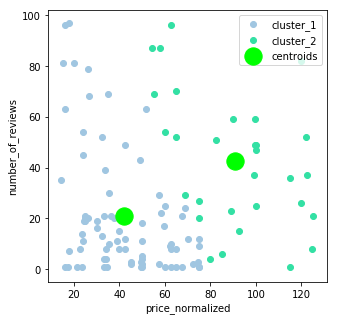

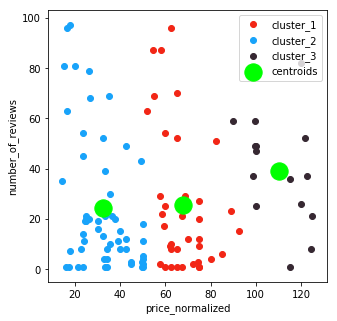

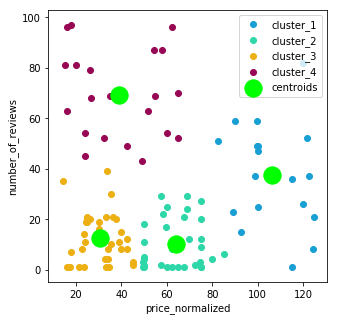

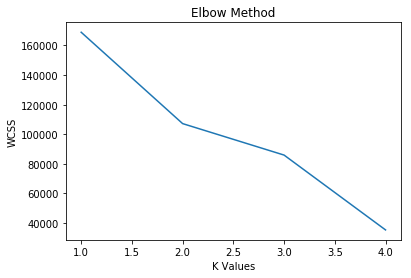

In [215]:
# Plot an Example

PlotElbow(home_staten, 100, 5) 

### Now Run K-Means Algorithm with K Value from Elbow Method 

From the above Elbow plot, the optimal K appears to be 2 or 3. 

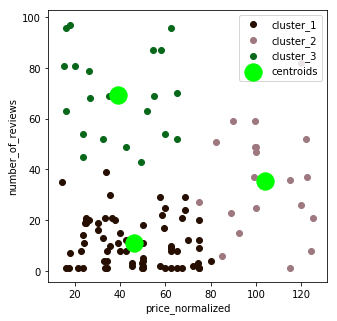

({1: array([[62.5       ,  8.        ],
         [25.        , 19.        ],
         [75.        ,  1.        ],
         [58.33333333, 22.        ],
         [14.14285714, 35.        ],
         [30.        , 16.        ],
         [21.42857143,  1.        ],
         [33.33333333, 21.        ],
         [25.        , 20.        ],
         [68.75      , 29.        ],
         [68.75      , 24.        ],
         [50.        ,  2.        ],
         [60.        , 25.        ],
         [72.25      ,  2.        ],
         [34.33333333,  1.        ],
         [67.5       , 21.        ],
         [75.        ,  9.        ],
         [22.5       ,  8.        ],
         [26.25      , 20.        ],
         [50.        ,  1.        ],
         [57.5       , 29.        ],
         [74.5       ,  3.        ],
         [49.5       ,  3.        ],
         [75.        , 20.        ],
         [35.5       , 30.        ],
         [16.        ,  1.        ],
         [24.        , 11.        ]

In [216]:
KMeansAlgorithm(home_staten, 100, 3)